In [1]:
! pip install pandas geopandas matplotlib descartes pygeos

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (20, 10)

In [5]:
madrid = gpd.read_file('data/districts.geojson').dropna().to_crs("crs")

In [6]:
madrid.rename(columns={'name': 'district'}, inplace=True)
madrid = madrid[['district', 'created_at', 'updated_at', 'geometry']]
madrid

,district,created_at,updated_at,geometry
0,Centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40..."
1,Arganzuela,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.70258 40.40638, -3.70166 40..."
2,Retiro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.66279 40.40971, -3.66384 40..."
3,Salamanca,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.65809 40.43945, -3.65828 40..."
4,Chamartin,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.67231 40.48388, -3.67237 40..."
5,Tetuan,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69633 40.47572, -3.69619 40..."
6,Chamberi,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.68991 40.44737, -3.69048 40..."
7,Fuencarral-El Pardo,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.64131 40.63922, -3.64118 40..."
8,Moncloa-Aravaca,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.79973 40.47063, -3.79887 40..."
9,Latina,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.72130 40.41256, -3.72051 40..."


<AxesSubplot:>

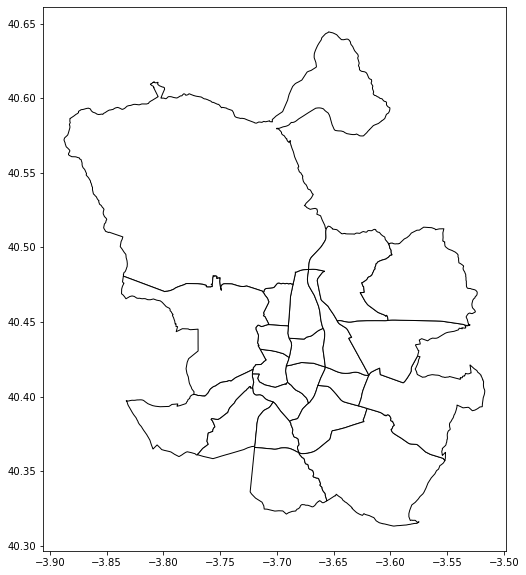

In [7]:
madrid.plot(color='white', edgecolor='black')

In [8]:
consumption = pd.read_csv('datasets/consumo_energia_edificios.csv', index_col='ID', sep=';', skip_blank_lines=True).dropna()
consumption.rename(columns={
    'DISTRITO': 'district',
    'A�O': 'year',
    'MES': 'month',
    'COORDENADA-X': 'x',
    'COORDENADA-Y': 'y',
    'LONGITUD': 'longitude',
    'LATITUD': 'latitude',
    'CLASE': 'class',
    'GRUPO': 'group',
    'UNIDADES': 'units',
    'CONSUMO': 'consumption'
}, inplace=True)
consumption = consumption.drop(['TIPOEDIFICIO', 'EDIFICIO', 'DIRECCION', 'BARRIO', 'SENSOR', 'TIPO', 'x', 'y', 'longitude', 'latitude'], axis=1)
consumption = consumption[consumption['units'] == 'kWh']
consumption['consumption'] = pd.to_numeric(consumption['consumption'], errors='coerce')
#consumption = consumption.dropna()

In [9]:
consumption

,year,month,district,class,group,units,consumption
ID,,,,,,,
1937.0,2020.0,3.0,HORTALEZA,Energia activa,Activa Interruptor Gral,kWh,30565.0
1918.0,2020.0,3.0,VILLA DE VALLECAS,Energia activa,Ninguno,kWh,35192.0
1889.0,2020.0,3.0,CIUDAD LINEAL,Energia activa,Activa Interruptor Gral,kWh,15188.0
1119.0,2020.0,3.0,ARGANZUELA,Energia activa,Activa Contador Gral - Bus,kWh,41459.0
1929.0,2020.0,3.0,HORTALEZA,Energia activa,Activa Interruptor Gral,kWh,12927.0
...,...,...,...,...,...,...,...
1033.0,2020.0,10.0,CENTRO,Energia activa,Activa Contador Gral - Bus,kWh,NaN
209.0,2020.0,10.0,CENTRO,Energia activa,Activa Contador Gral - Bus,kWh,NaN
1208.0,2020.0,10.0,VILLA DE VALLECAS,Energia activa,Activa Interruptor Gral,kWh,4841.0


In [10]:
consumption['district'] = consumption['district'].str.lower()
madrid['district'] = madrid['district'].str.lower()
madrid.head()

,district,created_at,updated_at,geometry
0,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40..."
1,arganzuela,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.70258 40.40638, -3.70166 40..."
2,retiro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.66279 40.40971, -3.66384 40..."
3,salamanca,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.65809 40.43945, -3.65828 40..."
4,chamartin,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.67231 40.48388, -3.67237 40..."


In [11]:
consumption.head()

,year,month,district,class,group,units,consumption
ID,,,,,,,
1937.0,2020.0,3.0,hortaleza,Energia activa,Activa Interruptor Gral,kWh,30565.0
1918.0,2020.0,3.0,villa de vallecas,Energia activa,Ninguno,kWh,35192.0
1889.0,2020.0,3.0,ciudad lineal,Energia activa,Activa Interruptor Gral,kWh,15188.0
1119.0,2020.0,3.0,arganzuela,Energia activa,Activa Contador Gral - Bus,kWh,41459.0
1929.0,2020.0,3.0,hortaleza,Energia activa,Activa Interruptor Gral,kWh,12927.0


In [12]:
madrid_consumption = madrid.merge(consumption, on='district')
madrid_consumption

,district,created_at,updated_at,geometry,year,month,class,group,units,consumption
0,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Activa Interruptor Gral,kWh,NaN
1,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Activa Contador Gral - Bus,kWh,0.0
2,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Ninguno,kWh,0.0
3,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Activa Interruptor Gral,kWh,3536.0
4,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Activa Contador Gral - Bus,kWh,NaN
...,...,...,...,...,...,...,...,...,...,...
379,barajas,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.56045 40.51234, -3.56036 40...",2020.0,8.0,Energia activa,Activa Interruptor Gral,kWh,29192.0
380,barajas,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.56045 40.51234, -3.56036 40...",2020.0,9.0,Energia activa,Ninguno,kWh,NaN
381,barajas,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.56045 40.51234, -3.56036 40...",2020.0,9.0,Energia activa,Activa Interruptor Gral,kWh,32775.0
382,barajas,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.56045 40.51234, -3.56036 40...",2020.0,10.0,Energia activa,Ninguno,kWh,NaN


In [13]:
x = madrid_consumption.groupby(['district'])['consumption'].sum()
x.head()

district
arganzuela        808550.0
barajas           289396.0
carabanchel       151827.0
centro           2546964.0
ciudad lineal     416094.0
Name: consumption, dtype: float64

In [21]:
consumption_by_district = madrid.merge(madrid_consumption, on='district').dropna()

In [22]:
consumption_by_district.head()

,district,created_at_x,updated_at_x,geometry_x,created_at_y,updated_at_y,geometry_y,year,month,class,group,units,consumption
1,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Activa Contador Gral - Bus,kWh,0.0
2,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Ninguno,kWh,0.0
3,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Activa Interruptor Gral,kWh,3536.0
5,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Activa Contador Gral - Bus,kWh,6495.0
6,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Activa Contador Gral - Bus,kWh,20949.0


In [23]:
#consumption_by_district.reindex()
#consumption_by_district = consumption_by_district[['district', 'geometry_x', 'consumption']]
consumption_by_district.head()

,district,created_at_x,updated_at_x,geometry_x,created_at_y,updated_at_y,geometry_y,year,month,class,group,units,consumption
1,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Activa Contador Gral - Bus,kWh,0.0
2,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Ninguno,kWh,0.0
3,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Activa Interruptor Gral,kWh,3536.0
5,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Activa Contador Gral - Bus,kWh,6495.0
6,centro,2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2013-12-02T07:20:26+01:00,2013-12-02T07:20:26+01:00,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...",2020.0,3.0,Energia activa,Activa Contador Gral - Bus,kWh,20949.0
